## <small>
Copyright (c) 2017-21 Andrew Glassner

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
</small>



# Deep Learning: A Visual Approach
## by Andrew Glassner, https://glassner.com
### Order: https://nostarch.com/deep-learning-visual-approach
### GitHub: https://github.com/blueberrymusic
------

### What's in this notebook

This notebook is provided to help you work with Keras and TensorFlow. It accompanies the bonus chapters for my book. The code is in Python3, using the versions of libraries as of April 2021.

Note that I've included the output cells in this saved notebook, but Jupyter doesn't save the variables or data that were used to generate them. To recreate any cell's output, evaluate all the cells from the start up to that cell. A convenient way to experiment is to first choose "Restart & Run All" from the Kernel menu, so that everything's been defined and is up to date. Then you can experiment using the variables, data, functions, and other stuff defined in this notebook.

## Bonus Chapter 1 - Notebook 7: Polynomials

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()

In [2]:
# Make a File_Helper for saving and loading files.

save_files = False

import os, sys, inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
sys.path.insert(0, os.path.dirname(current_dir)) # path to parent dir
from DLBasics_Utilities import File_Helper
file_helper = File_Helper(save_files)

Using TensorFlow backend.


In [3]:
def f_n(x, n):
    return x**n

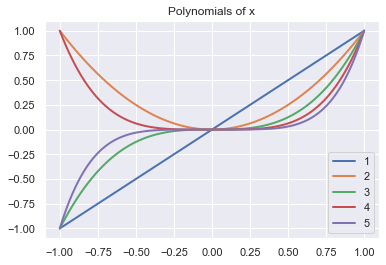

In [4]:
num_pts = 100
x = np.linspace(-1, 1, num_pts)
for i in range(1,6):
    y = f_n(x, i)
    plt.plot(x, y, linewidth=2, label=str(i))
plt.legend(loc='lower right')
plt.title('Polynomials of x')
file_helper.save_figure('polynomials')
plt.show()

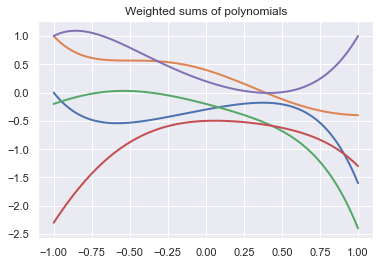

In [5]:
num_pts = 100
weights_list = [(.5, -.2, -.5, -.3, -.8), (-.8, -.9, .6, .8, -.5), (-.7, -.3, .1, -.8, -.5),
               (.1, -.9, .7, -.4, -.3), (-.9, .8, .3, 0, .6)]
bias_list = [-0.3, 0.4, -0.2, -0.5,  0.2]
x = np.linspace(-1, 1, num_pts)
for g in range(len(weights_list)):
    weights = weights_list[g]
    y = [bias_list[g]] * num_pts
    for i in range(len(weights)):
        y = [y[p] + (weights[i]*f_n(x[p], 1+i)) for p in range(num_pts)]
    plt.plot(x, y, linewidth=2, label=str(weights))
plt.title('Weighted sums of polynomials')
file_helper.save_figure('summed-polynomials')
plt.show()

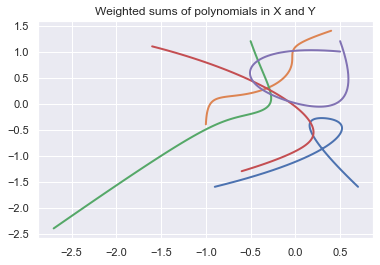

In [6]:
num_pts = 100
weights_list = [(.5, -.2, -.5, -.3, -.8), (-.8, -.9, .6, .8, -.5), (-.7, -.3, .1, -.8, -.5),
               (.1, -.9, .7, -.4, -.3), (-.9, .8, .3, 0, .6)]
bias_list = [-0.3, 0.4, -0.2, -0.5,  0.2]
t = np.linspace(-1, 1, num_pts)
for g in range(len(weights_list)):
    weights = weights_list[g]
    y = [bias_list[g]] * num_pts
    x = [bias_list[(g+1)%len(bias_list)]] * num_pts
    for i in range(len(weights)):
        x = [x[p] + (weights[i]*f_n(t[p], 1+i)) for p in range(num_pts)]
        y = [y[p] + (weights[(i+1)%len(weights_list)]*f_n(t[p], 1+i)) for p in range(num_pts)]
    plt.plot(x, y, linewidth=2, label=str(weights))
plt.title('Weighted sums of polynomials in X and Y')
file_helper.save_figure('summed-polynomials-xy')
plt.show()